# **OCR using Convolutional Neural Networks.**
 **On [MNIST](http://yann.lecun.com/exdb/mnist/) dataset.**

### **Knowing the shape and exploring the dataset.**
**Importing [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, from TensorFlow Keras.**



In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()  # data is imported from mnist (tensorflow dataset library)
print('Shape of the dataset.')
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

11490434/11490434 [==============================] - 0s 0us/step
Shape of the dataset.
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [2]:
train_labels_count = np.unique(y_train, return_counts=True)
test_labels_count = np.unique(y_test, return_counts=True)
dataframe_labels = pd.DataFrame({'Label':train_labels_count[0], 'Count Train':train_labels_count[1],'Count Test':test_labels_count[1]})
print(dataframe_labels.to_string(index=False))

 Label  Count Train  Count Test
     0         5923         980
     1         6742        1135
     2         5958        1032
     3         6131        1010
     4         5842         982
     5         5421         892
     6         5918         958
     7         6265        1028
     8         5851         974
     9         5949        1009


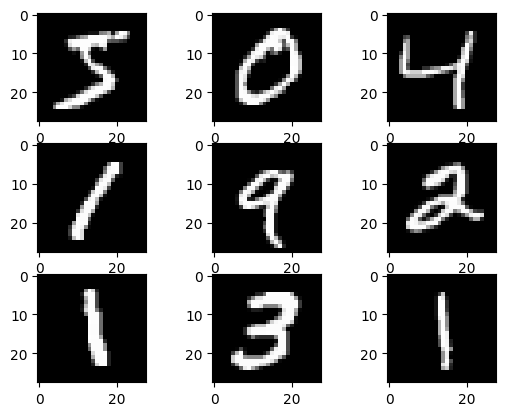

In [3]:
# 9 sample images of the dataset
for i in range(9):
	plt.subplot(331 + i)
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
print('Train dataset ranges from ', X_train.min(),' to ', X_train.max(),'.')
print('Train dataset mean value:', round(X_train.mean(),3))
print('Test dataset ranges from ', X_test.min(),' to ', X_test.max(),'.')
print('Test dataset mean value: ', round(X_test.mean(),3))

Train dataset ranges from  0  to  255 .
Train dataset mean value: 33.318
Test dataset ranges from  0  to  255 .
Test dataset mean value:  33.791


### **Reshaping and Normalizing the dataset**

Reshaping the array to 4-dims so that it can work with the Keras API.

Rescale pixel values from the range of 0-255 to the range 0-1 preferred for neural network models.

In [5]:
# Reshaping
# (sample index, height, width, colour channel)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize
# divided by 255 (pixel values are from 0 to 255) to get values between 0 and 1
X_train /= 255.0
X_test /= 255.0
print('Train dataset ranges from ', X_train.min(),' to ', X_train.max(),'.')
print('Train dataset mean value:', round(X_train.mean(),3))
print('Test dataset ranges from ', X_test.min(),' to ', X_test.max(),'.')
print('Test dataset mean value: ', round(X_test.mean(),3))


Train dataset ranges from  0.0  to  1.0 .
Train dataset mean value: 0.131
Test dataset ranges from  0.0  to  1.0 .
Test dataset mean value:  0.133


### **Keras imports for building our convolutional neural network (CNN) model.**


In [6]:
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input, MaxPooling2D
#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score

In [7]:
# one-hot encoding using numpy-related utilities of tensorflow's keras
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [11]:
model = Sequential()
# convolutional layer
model.add(Input(shape =(28,28,1)))
model.add(Conv2D(25, kernel_size=(3,3), strides=(6,6), padding='valid', activation='relu'))
#model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
# max pooling layer
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# Compiling the sequential model
# A loss function is one of the two mandatory arguments required for compiling a Keras model
# We are using categorical crossentropy because we are trying to solve a MULTI-CLASS classification problem
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')



In [12]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 5, 5, 25)          250       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 25)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 625)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               62600     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 63860 (249.45 KB)
Trainable params: 63860 (249.45 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [13]:
# training the model for 5 epochs
# (input features, target labels, number of samples per iteration of training, number of epochs, val. dataset specs)
hist = model.fit(X_train, Y_train, batch_size=256, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
235/235 [==============================] - 5s 17ms/step - loss: 0.9075 - accuracy: 0.7427 - val_loss: 0.5204 - val_accuracy: 0.8399
Epoch 2/5
235/235 [==============================] - 4s 17ms/step - loss: 0.4769 - accuracy: 0.8532 - val_loss: 0.4129 - val_accuracy: 0.8700
Epoch 3/5
235/235 [==============================] - 3s 13ms/step - loss: 0.3833 - accuracy: 0.8834 - val_loss: 0.3373 - val_accuracy: 0.8971
Epoch 4/5
235/235 [==============================] - 3s 13ms/step - loss: 0.3262 - accuracy: 0.9016 - val_loss: 0.3006 - val_accuracy: 0.9056
Epoch 5/5
235/235 [==============================] - 3s 14ms/step - loss: 0.2883 - accuracy: 0.9120 - val_loss: 0.2716 - val_accuracy: 0.9142


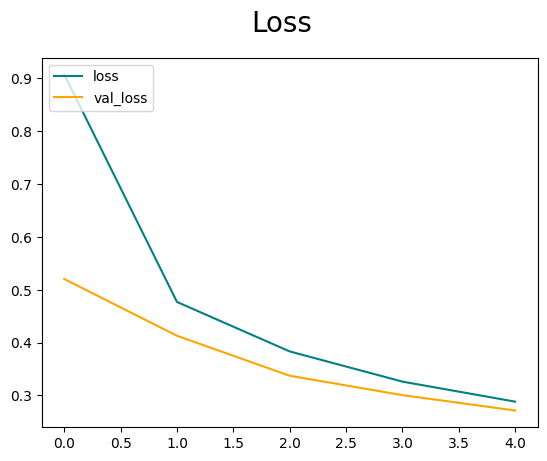

In [14]:
from matplotlib import pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Observations:**


*   The CNN model is able to get 98%+ accuracy with just a single convolution layer.
*   We can also add more Conv2D layers, and also play around with the hyperparameters of the CNN model to increase the accuracy further more.


### **Visualizing the model.**

In [ ]:
# Install the visualkeras library if it's not there for you
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 10.8 MB/s eta 0:00:00


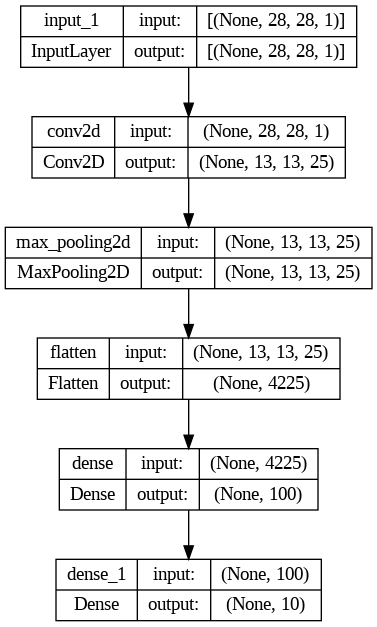

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

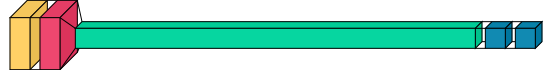

In [ ]:
import visualkeras
visualkeras.layered_view(model)
#visualkeras.layered_view(model, legend=True)

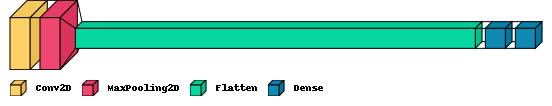

In [ ]:
#Now we will add the legend to the visualization.
visualkeras.layered_view(model, legend=True)

### **Making individual predictions.**

No. of values in test dataset:  10000
1/1 [==============================] - 0s 32ms/step


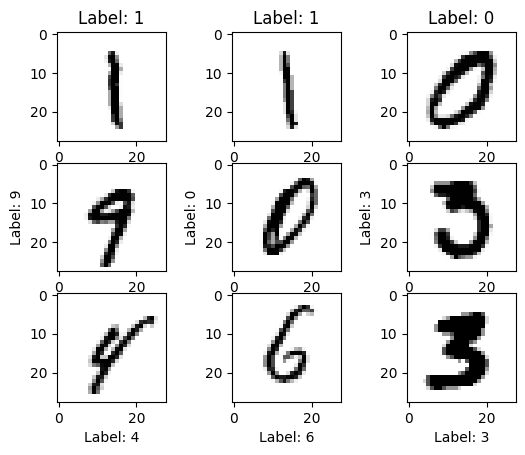

In [ ]:
import random as r
print('No. of values in test dataset: ',X_test.shape[0])
for i in range (9):
  image_index=r.randint(0,10000)
  plt.subplot(331 + i)
  plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
  pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
  if i<3:
    plt.title('Label: ' + str(pred.argmax()))
  elif i>=3 and i<6:
    plt.ylabel('Label: ' + str(pred.argmax()))
  else:
    plt.xlabel('Label: ' + str(pred.argmax()))
plt.show()

This is the individual character prediction from train dataset.

### **Evaluating Keras model.**

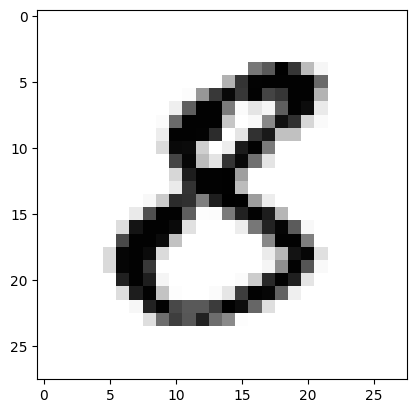

In [ ]:
import time

test = 1234
plt.imshow(X_test[test].reshape(28, 28),cmap='Greys')

In [ ]:
expected_label=Y_test[test].argmax()
digit_image = X_test[test].reshape(1, 28, 28, 1)
# repeat few times to take the average execution time
loop_count = 10

start_time = time.time()
for i in range(loop_count):
    prediction = model.predict(digit_image)
print("Keras inferences with %s second in average" %((time.time() - start_time) / loop_count))

print(prediction)
predicted_label = prediction.argmax()
print('Predicted value:', predicted_label)
if (expected_label == predicted_label):
  print('Correct prediction !')
else:
  print('Wrong prediction !')
#saving keras model
model.save('mnist-model.keras')

1/1 [==============================] - 0s 34ms/step
Keras inferences with 0.15947215557098388 second in average
[[6.8761136e-07 1.7072261e-07 1.0058437e-03 3.9909310e-03 6.1245546e-09
  7.4041118e-03 1.6645205e-04 6.4075678e-09 9.8743153e-01 2.4126408e-07]]
Predicted value: 8
Correct prediction !


### **Conversion from Keras to ONNX.**
Importing ONNX packages from source.

In [ ]:
#!pip install --upgrade protobuf
!pip install onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 43.8 MB/s eta 0:00:00


In [ ]:
!pip install tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 4.4 MB/s eta 0:00:00


In [ ]:
import onnx
import os
os.environ['TF_KERAS'] = '1'
import tf2onnx

onnx_model_path = 'mnist-model.onnx'

model = keras.models.load_model('mnist-model.keras')
onnx_model, _ = tf2onnx.convert.from_keras(model)
onnx.save(onnx_model, onnx_model_path)

### **Evaluating ONNX model perfomance.**
Inference

In [ ]:
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.8 MB/s eta 0:00:00


In [ ]:
import onnxruntime

sess_options = onnxruntime.SessionOptions()
sess = onnxruntime.InferenceSession(onnx_model_path, sess_options)
data = [digit_image.astype(np.float32)]
input_names = sess.get_inputs()
feed = dict([(input.name, data[n]) for n, input in enumerate(sess.get_inputs())])

In [ ]:
start_time = time.time()
for i in range(loop_count):
    onnx_predicted_label = sess.run(None, feed)[0].argmax()
print("ONNX inferences with %s second in average" %((time.time() - start_time) / loop_count))

print('ONNX predicted value:', onnx_predicted_label)
if (expected_label == onnx_predicted_label):
  print('Correct prediction !')
else:
  print('Wrong prediction !')

if (predicted_label == onnx_predicted_label):
  print("The ONNX's and keras' prediction are matching !")
else:
  print("The ONNX's and keras' prediction does not match !")

ONNX inferences with 0.0002035856246948242 second in average
ONNX predicted value: 8
Correct prediction !
The ONNX's and keras' prediction are matching !


Answer the questions below

1. Why have we applied one-hot encoding to Y_train and Y_test?
  a. This is for normalization of values. It makes the classes/numbers become a combination of 0s and 1s.

2. Change the stride of the CNN model by increasing it. What value will you increase it to?
  a. Increase to (6,6).

3. After changing the stride what is the number of training parameters of the model and how does it compare to the previous number?
  a. With the stride (3,3) - # of parameters: 423,860
  b. With the stride of (6,6) - # of parameters: 63,860

4. Change the training batch size of the model from 128 to 256. Re-train and test the model again, with the new stride and batch size. According to your observations how have these changes impacted the model's performance?
  a. The original model accuracy was 98% with a smaller stride (3,3), but when stride was increased to (6,6), accuracy dropped down to 91%.

*References:*

---


* [Medium.com/CNN](https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148)
* [TowardsDataScience.com/CNN](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)
* [Machine Learning & Deep Learning Fundamentals.](https://www.youtube.com/playlist?list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU)